In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
extract_r = np.ones([3,3,3])/-9
extract_g = np.ones([3,3,3])/-9
extract_b = np.ones([3,3,3])/-9
extract_b[:,:,0] = np.ones([3,3])/4.3
extract_g[:,:,1] = np.ones([3,3])/4.3
extract_r[:,:,2] = np.ones([3,3])/4.3

In [0]:
def convolve3D(image,kernel):
  tmp = kernel.shape[0]
  opx = image.shape[0] - tmp + 1
  opy = image.shape[1] - tmp + 1
  op_img = np.zeros([opx,opy])
  kernel_flatten = kernel.flatten()
  for img_i in range(1,image.shape[0]-1):
    for img_j in range(1,image.shape[1]-1):
      temp = image[img_i-1:img_i+2,img_j-1:img_j+2,:].flatten()
      op_pix_val = np.dot(kernel_flatten,temp)
      if op_pix_val > 0:
        op_img[img_i-1,img_j-1] = op_pix_val
  return op_img

In [0]:
img = cv2.imread('c2.jpg')
cv2_imshow(img)

In [0]:
image_name = "c2.jpg"
img = cv2.imread(image_name)

scale_factor = 1000.0/img.shape[1]
height = int(img.shape[1]*scale_factor)
width = int(img.shape[0]*scale_factor)
img = cv2.resize(img,(height,width))


red = convolve3D(img,extract_r)
green = convolve3D(img,extract_g)
blue = convolve3D(img,extract_b)
green[green<50] = 0
red[red<70] = 0
blue[blue<40] = 0

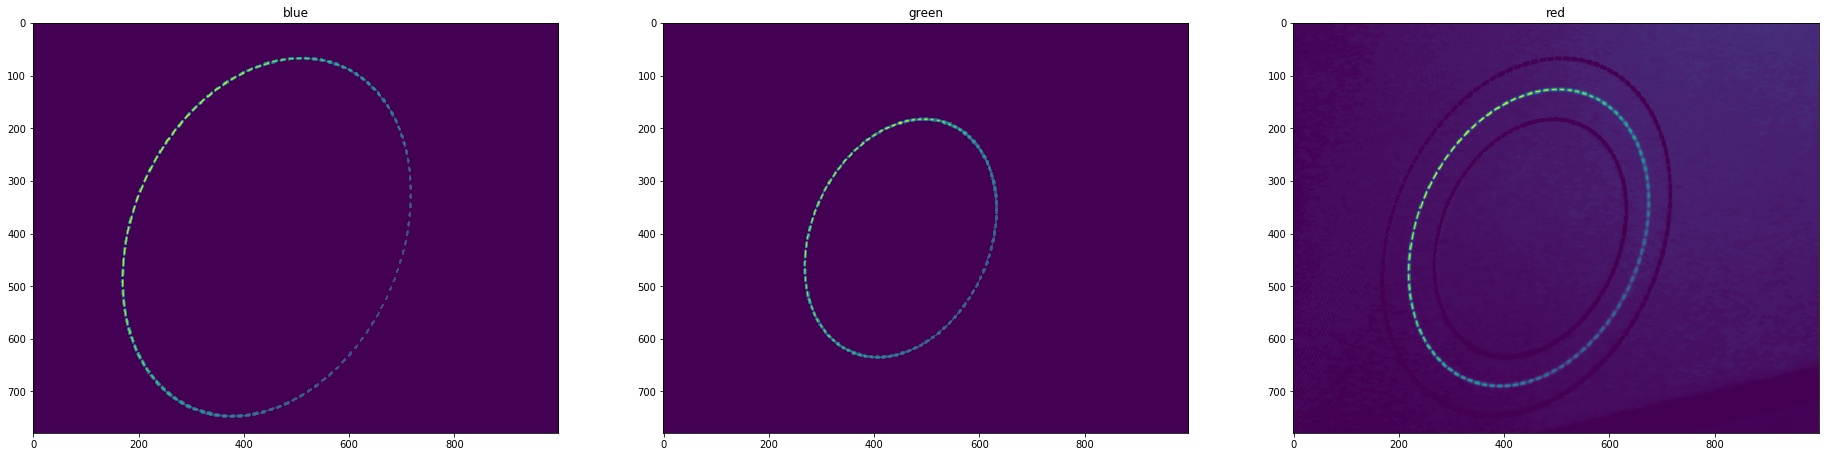

In [0]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(32, 32))
columns = 3
rows = 1
ax = fig.add_subplot(rows, columns, 1)
ax.set_title("blue")
plt.imshow(blue)
ax = fig.add_subplot(rows, columns, 2)
ax.set_title("green")
plt.imshow(green)
ax = fig.add_subplot(rows, columns, 3)
ax.set_title("red")
plt.imshow(red)

plt.show()

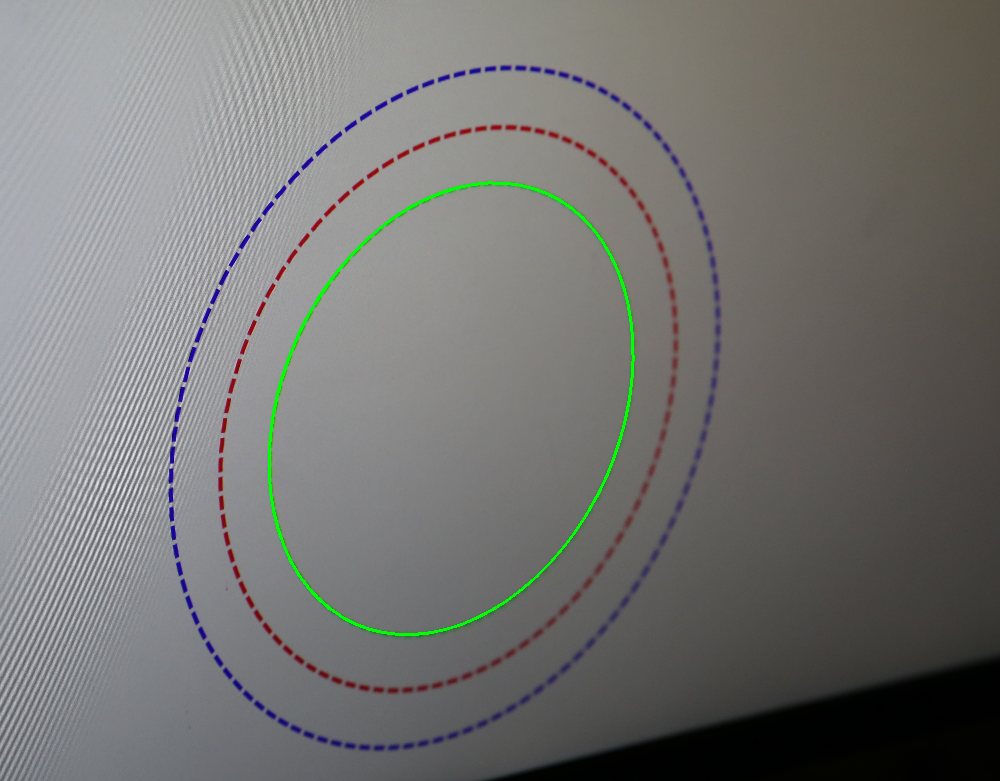

In [0]:
img = cv2.imread(image_name)
scale_factor = 1000.0/img.shape[1]
height = int(img.shape[1]*scale_factor)
width = int(img.shape[0]*scale_factor)
img = cv2.resize(img,(height,width))

green_bw = cv2.threshold(green, 80, 255, cv2.THRESH_BINARY)[1]
contours = cv2.findContours(np.int32(green_bw),cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_TC89_L1)
combined_contours = contours[1][0] 
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,255,0),2)
cv2_imshow(img)

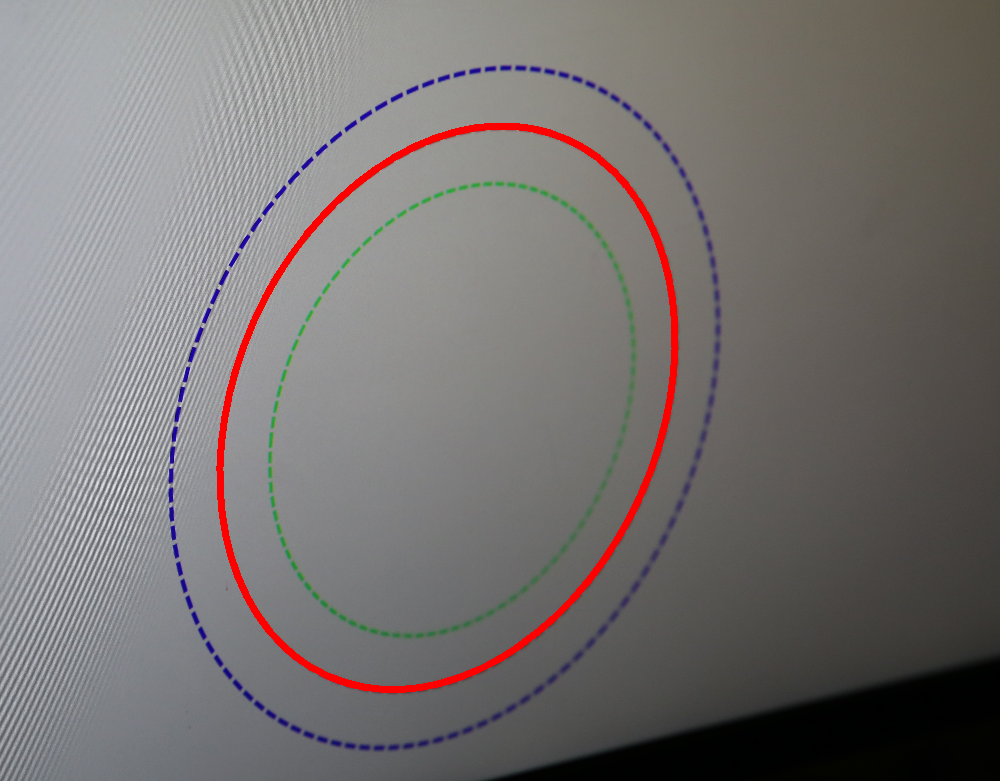

((446.9803466796875, 407.2652282714844),
 (424.1194763183594, 587.623779296875),
 24.191875457763672)

In [0]:
img = cv2.imread(image_name)
scale_factor = 1000.0/img.shape[1]
height = int(img.shape[1]*scale_factor)
width = int(img.shape[0]*scale_factor)
img = cv2.resize(img,(height,width))

red_bw = cv2.threshold(red, 80, 255, cv2.THRESH_BINARY)[1]
contours = cv2.findContours(np.int32(red_bw),cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_TC89_L1)
combined_contours = contours[1][0]
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(0,0,255),5)
cv2_imshow(img)
ellipse

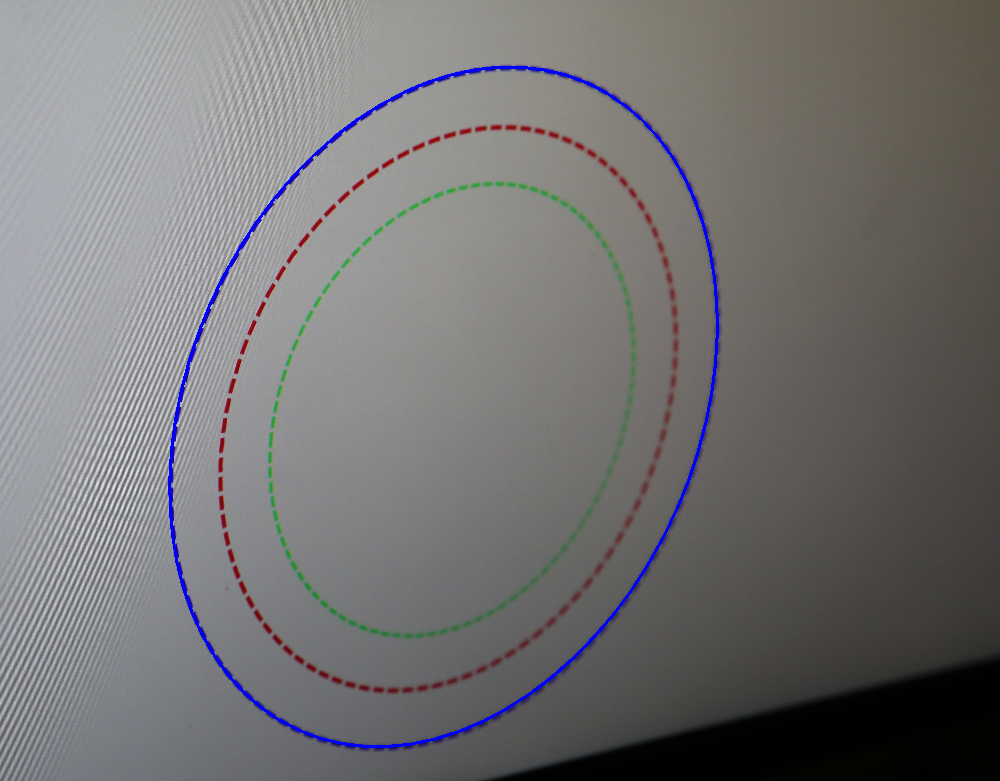

In [0]:
img = cv2.imread(image_name)
scale_factor = 1000.0/img.shape[1]
height = int(img.shape[1]*scale_factor)
width = int(img.shape[0]*scale_factor)
img = cv2.resize(img,(height,width))

blue_bw = cv2.threshold(blue, 50, 255, cv2.THRESH_BINARY)[1]
contours = cv2.findContours(np.int32(blue_bw),cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_TC89_L1)
combined_contours = contours[1][0] 
for i in range(1,len(contours[1])):
    combined_contours = np.concatenate((combined_contours,contours[1][i]))
ellipse = cv2.fitEllipse(combined_contours)
cv2.ellipse(img,ellipse,(255,0,0),2)
cv2_imshow(img)